Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
from matplotlib import pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    np.random.seed(5)
    X = np.random.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

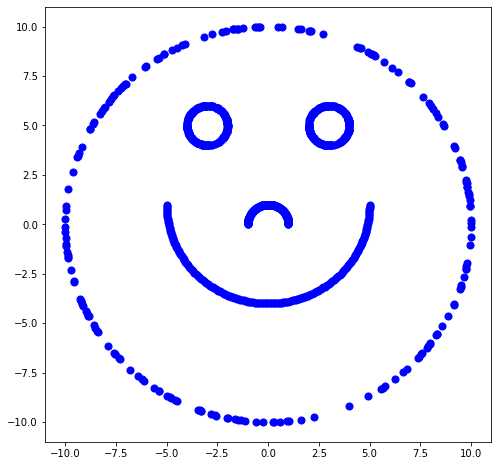

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 





## Algorithm: K-Means CLustering 
1. Choose the number of clusters K and initialize cluster centres randomly

Repeat steps 2 and 3 until convergence or until the end of a fixed number of iterations

2. For each data point x_i: Find the nearest centroid {c_1, c_2 .. c_k} and assign the point to that cluster 
<br>

3. For each cluster j = 1..k: Find new centroid = mean of all points assigned to that cluster 

In [4]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2n_iter=100
K=5 # number of clusters
n_iter=100

In [5]:
m,n

(1000, 2)

In [6]:
def kmeans(X,K):
    np.random.seed(5)
    centroids=np.array([]).reshape(n,0)
    for i in range(K):
        idx=np.random.randint(0,m-1)
        centroids=np.c_[centroids,X[idx]]
    C=np.zeros(m,)
    
    for i in range(n_iter):
        C_prev=C
        distance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-centroids[:,k])**2,axis=1)
            distance=np.c_[distance,tempDist]
        C=np.argmin(distance,axis=1)+1
        if(np.array_equal(C_prev,C,equal_nan=True)):
            break
        
        Y={}

        for k in range(K):
            Y[k+1]=np.array([]).reshape(n,0)

        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
        for k in range(K):
            Y[k+1]=Y[k+1].T

        for k in range(K):
            centroids[:,k]=np.mean(Y[k+1],axis=0)
        Output=Y

    return centroids, Output

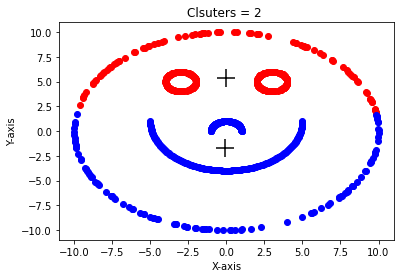

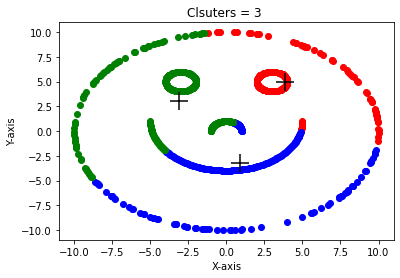

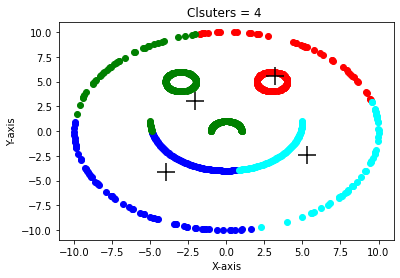

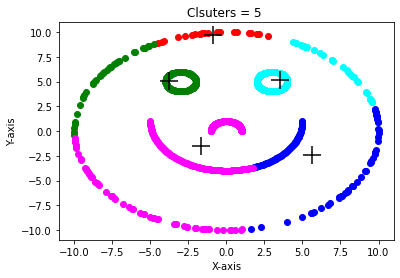

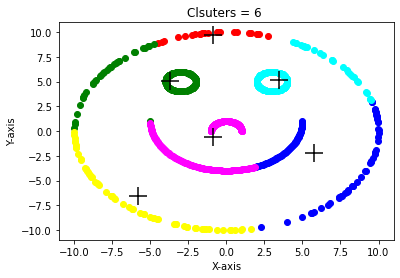

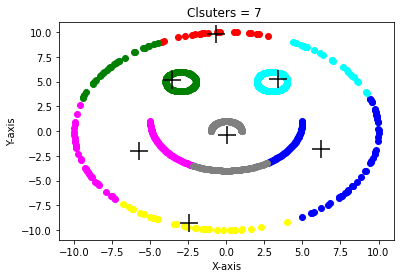

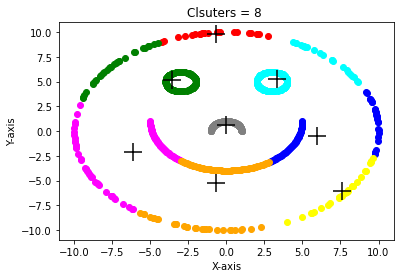

In [7]:
def kmeansloop(K):
    Centroids,Output = kmeans(X,K)
    color=['red','blue','green','cyan','magenta','yellow','grey','orange']
    # ['red','blue','green','orange','pink','yellow','grey','purple']
    labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8']
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    Centroids = np.array(Centroids).T
    plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='black',label='Centroids', marker='+')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Clsuters = %d '%(K))
    # plt.legend()
    plt.show()
for i in range(2,9):
    kmeansloop(i)

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]



### Here we define functions to intialize points using kmeans++ and then plot

In [8]:
def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def initialize(data, k):
    # initialize the centroids list and add a randomly selected data point to the list
    centroids = []
    np.random.seed(5)
    centroids.append( data[np.random.randint(data.shape[0]), :] )
    # plot(data, np.array(centroids))
  
    # compute remaining k - 1 centroids
    for c_id in range(k - 1):
        # initialize a list to store distances of data points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
             
            # compute distance of 'point' from each of the previously selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        # select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
    return centroids
def kmeansplusplus(K):
    Centroids = initialize(X, K)
    Centroids = np.array(Centroids).T
    Output = {}
    C=np.zeros(m,)
    
    for i in range(n_iter):
        C_prev=C
        distance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            distance=np.c_[distance,tempDist]
        C=np.argmin(distance,axis=1)+1
        if(np.array_equal(C_prev,C,equal_nan=True)):
            break

        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
        for k in range(K):
            Y[k+1]=Y[k+1].T

        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
        Output=Y
    color = ['red','blue','green','cyan','magenta','yellow','grey','orange']
    labels = ['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8']
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    Centroids = np.array(Centroids).T
    plt.scatter(Centroids[:, 0], Centroids[:, 1],color = 'black', label = 'centroids', marker='X')
    plt.title('K-Means++ when K=%d' %(K))
    plt.show()  

### Here we will show kmeans++ with different number of clusters as we don't know which is the optimal cluster size.

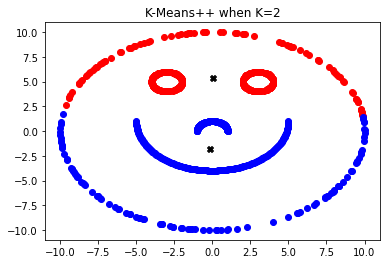

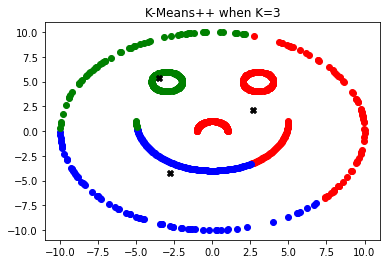

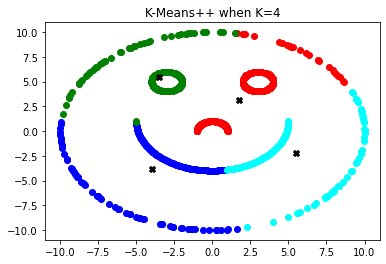

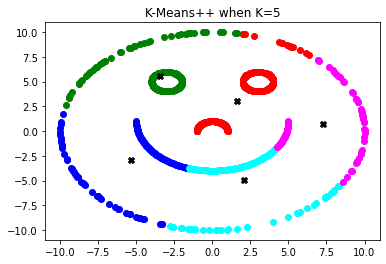

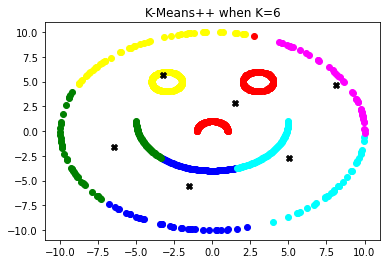

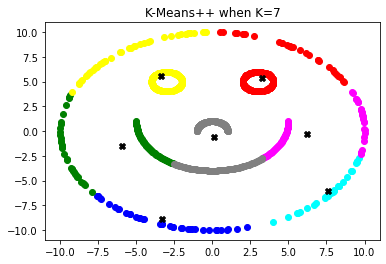

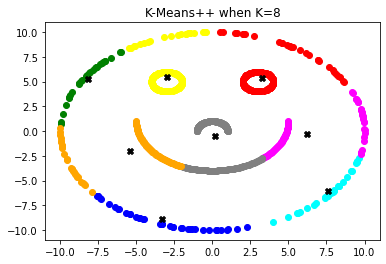

In [9]:
for i in range(2,9):
    kmeansplusplus(i)

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]

### To find the optimal number of cluasters, we use "Elbow Method"

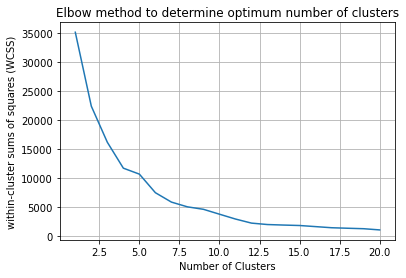

In [10]:
# WCSS: Within Cluster Sum of Sqaures
WCSS_array=np.array([])
for K in range(1,21):
    wcss=0
    Centroids,Output = kmeans(X, K)
    Centroids = np.array(Centroids).T
    #print(Centroids, Output)
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)
    # print(K, wcss)
K_array=np.arange(1,21,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.rcParams["figure.figsize"] = (7,7)
plt.grid()
plt.show()

## By using elbow method, we find that the optimal number of clusters is 5. However, the clustering obtained with k=5 has resulted in clustering of same face area into different clusters.

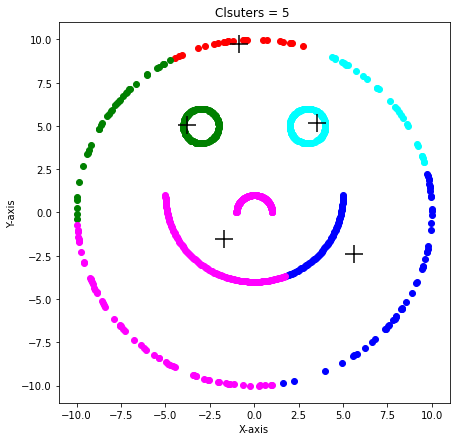

In [11]:
kmeansloop(5)

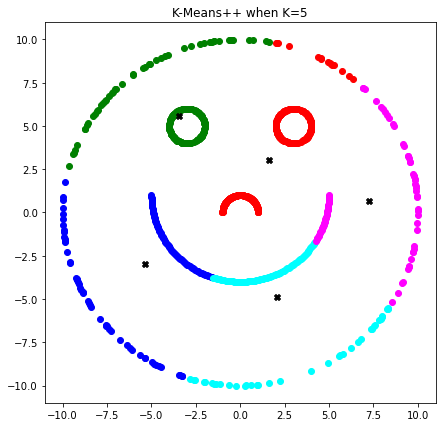

In [12]:
kmeansplusplus(5)

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

In [13]:
X_ = np.zeros(1000000).reshape(1000,1000)
for i in range(1000):
    for j in range(1000):
        x = X[i] - X[j]
        var = 4    
        val = (x[0]**2 + x[1]**2)/(2*var*2)
        X_[i][j] = np.exp(-val)

In [14]:
def KMeansGaussian(X,K):
    m=X.shape[0] #number of training examples
    n=X.shape[1] #number of features. Here n=1000
    n_iter=100
    Centroids=np.array([]).reshape(m,0) 
    np.random.seed(10)
    for i in range(K):
        rand = np.random.randint(0, m-1)
        Centroids=np.c_[Centroids,X[rand]]
    C=np.zeros(m,)

    for i in range(n_iter):
        #step 2.aC
        C_prev=C
        distance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            distance=np.c_[distance,tempDist]
        C=np.argmin(distance,axis=1)+1
        if(np.array_equal(C_prev,C,equal_nan=True)):
            break
        Y = {}

        Y_indexes = {}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(1000,0)
            Y_indexes[k+1]=np.array([]).reshape(1,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
            Y_indexes[C[i]]=np.c_[Y_indexes[C[i]],i]
        for k in range(K):
            Y[k+1]=Y[k+1].T
        
        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
    return Y_indexes

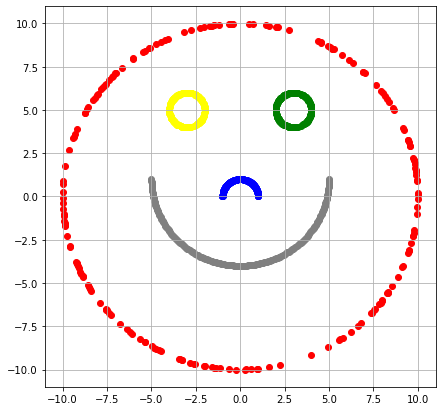

In [15]:
K=5
Y_indexes = KMeansGaussian(X_, K=5)
color=['red','blue','green','yellow','grey']
for k in range(1,K+1,1):
    x = X[list(map(int, Y_indexes[k].tolist()[0])),0]
    y = X[list(map(int, Y_indexes[k].tolist()[0])),1]
    plt.scatter(x, y,c=color[k-1])
plt.grid()
plt.show()

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

$\theta=\left\{u_{1}, u_{2}, \ldots u_{k}, \sigma_{1}^{2}, \sigma_{2}^{2}, \ldots \sigma_{k}^{2}\right\}$
<!-- <br> -->
$\theta$ represents $k$ spherical gaussians 
<br>
<br>
$ P(n)=\frac{1}{(2 \pi)^{d / 2} \sigma^{d}} \operatorname{exp}\left(-\frac{\|u-\mu\|^{2}}{2 \sigma^{2}}\right)$<br>
P(n) represents density of spherical gaussian $N\left(u, \sigma^{2} I_{d}\right), n \in R^{d}$
<br>
<br>
Let us assume,
<br>
$x=\left\{n_{1}, n_{2}, \ldots n_{n}\right\}$ are n identically and independently distributed samples 
<br>
$z=\left\{z_{1}, z_{2}, \ldots z_{n}\right\}$ are corresponding latent variables
<br>
Likelihood of $i^{th}$ sample coming from spherical gaussian $k$ be $\pi_{k}$
$ P\left(z_{i}=k / \theta\right)=\pi_{k} $

<br><br>
We have mixture weights as
$\left\{\pi_{1}, \pi_{2}, \ldots \pi_{k}\right\} \rightarrow \text { It is given that it is fixed}$

let
$\theta=\left\{u_{1}, u_{2}, \cdots u_{k}, \sigma_{1}^{2}, \sigma_{2}^{2}, \cdots \sigma_{k}^{2}, \pi_{1}, \pi_{2} \ldots \pi_{k}\right\}$
$\\$
Likelihood
$P\left(x_{i} / z_{i}=k, u_{k}, \sigma_{k}^{2}\right)=N\left(x_{i} / u_{k}, \sigma_{k}^{2}\right)$
$\\$
Now
probability of observing all the data points
$$
\begin{aligned}
P(x, z / \theta) &=\prod_{n=1}^{N} P\left(x_{n}, z_{n} / \theta\right) \\
&=\prod_{n=1}^{N} P\left(\left.z_{n}\right/\theta\right) P\left(x_{n} / z_{n}, \theta\right) \\
&=\prod_{n=1}^{N} \prod_{k=1}^{k}\left(\pi_{k}\right)^{z_{n k}} \prod_{k=1}^{k} P\left(x_{n} / z_{n}=k, \theta\right) z_{n k}
\end{aligned}
$$
$z_{n k}$ is the responsibility than $n^{\text {th }}$ data point belongs to cluster $k$ 
$$
\begin{aligned}
&\left.\sum z_{n 1}+z_{n 2}+\cdots+z_{n k}=1 \quad \forall n \in N\right] \\
=& \prod_{n=1}^{N} \prod_{k=1}^{k}\left[\pi_{k} * p\left(x_{n} / z_{n}=k, \theta\right)\right]
\end{aligned}
$$

For simplification taking $\log$
$$
\begin{array}{l}
\left.=\log \prod_{n=1}^{N} \prod_{k=1}^{K}\left[\pi_{k} * p\left(x_{n}\right/ z_{n}=k, \theta\right)\right]^{z_{n k}} \\
\left.=\sum_{n=1}^{N} \sum_{k=1}^{k} \log \left[\pi_{k} * p(x_{n}/ z_{n}=k, \theta\right)\right]^{z_{n k}} \\
=\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}+\log p\left(m_{n} \mid z_{n}=k, \theta\right)\right]
\end{array}
$$
We know
$$
\begin{aligned}
P\left(x_{n} / z_{n}=k, \theta\right) &=P\left(x_{n} / z_{n}=k, u_{k}, \sigma_{k}^{2}\right) \\
&\left.=N\left(x_{n}\right/ u_{k}, \sigma_{k}^{2}\right) \\
&=\frac{1}{(2 \pi)^{d / 2} \sigma_{k} ^{d}} exp\left(-\frac{\left\|n-u_{k}\right\|^{2}}{2 \sigma_{k}^{2}}\right)
\end{aligned}
$$
$=\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}+\log \frac{1}{(2 \pi)^{d / 2} \sigma_{k}^{d}} \exp \left(\frac{-\left\|x_{n}-u_{k}\right\|^{2}}{2 \sigma_{k}^{2}}\right)\right.$

$$
=\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}-\frac{\left\|x_{n}-\mu_{k}\right\|^{2}}{2 \sigma_{k}{ }^{2}}-\frac{d}{2} \log (2 \pi)-d \log \sigma_{k}\right]
$$


Now since we  dont know the responsibilty in the estimation step we estimate them.
we compute conditional posterior $P(Z|X, \theta)$.
since data points are iid, we compute separately for each n.
from  bayes theorem $$P(z_n=k|x_n,\theta) \propto P(z_n=k|\theta)P(x_n|z_n=k,\theta)= {\pi_k}{N(x_n|\hat{\mu_k},{\hat{\sigma_k}}^2})  \forall n,k$$
$$E[Z_{nk}^{t}]= \frac{{\pi_k}{N(x_n|\hat{\mu_k},\hat{\sigma_k}}}{{\sum_{k=1}^K{{\pi_k}{N(x_n|\hat{\mu_k},\hat{\sigma_k})}}}}, \forall n,k$$
Now we estimate $Z_{nk} \forall n,k$ . 
we have to update \theta, i.e $\mu_k,\sigma_k^2 \forall k $ to maximize the probability of observing all the data points.
therefore
$$\hat{\theta} = argmax \sum_{n=1}^N {\sum_{k=1}^K{ {Z_{nk}}\{\log\pi_k +\log{{\frac{1}{{(2\pi)}^{\alpha/2}{{\sigma_k}^\alpha }}}{e^{\frac{||x_n-\mu_k||^2}{{2}{\sigma_k}^2}}}}}}$$
Fo Maximize $\mu_k, \sigma_k$ we individually do derivative with respect to them. 
First let us do with respect to $\mu_k$

$$\frac{\partial{P(X, Z|\theta)}}{\partial{\mu_k}}= \sum_{n=1}^N {{Z_{nk}}{(x_n-\mu_k)}{\frac{1}{\sigma_k^2}}}$$
$$\therefore 0=\sum_{n=1}^N {{Z_{nk}}{(x_n-\mu_k)}{\frac{1}{\sigma_k^2}}}$$
$$\therefore {\mu_k}^= \frac{\sum_{n=1}^N {Z_{nk}}{x_n}}{ \sum_{n=1}^N {Z_{nk}}}$$
Now let us derivate for $\sigma_k$
$$\frac{\partial{P(X, Z|\theta)}}{\partial{\sigma_k}}=\sum_{n=1}^N {{Z_{nk}}{\frac{{||x_n-\mu_k||}^2}{{\sigma_k}^3}}}-\sum_{n=1}^N{{Z_{nk}}{\frac{d}{\sigma_k}}}$$
$$\therefore 0=\sum_{n=1}^N {{Z_{nk}}{\frac{{||x_n-\mu_k||}^2}{{\sigma_k}^3}}}-\sum_{n=1}^N{{Z_{nk}}{\frac{d}{\sigma_k}}}$$

simplyfying we get 
$$\sigma_k^2= \frac{\sum_{n=1}^N {{Z_{nk}}} {{(x_j-\mu_k)}{(x_j-\mu_k)}^T}}{{d}{\sum_{n=1}^N{Z_{nk}}} }$$
The E step is given by :
$$Z_{nk}^{(t+1)}=\frac{{{\pi_k}{N(x_n|{\mu_k}^{(t)},{\sigma_k}^{(2t)})}}}{\sum_{k=1}^K{{{\pi_k}{N(x_n|{\mu_k}^{(t)},{\sigma_k}^{(2t)})}}}}$$
The M step is given by :
$$ {\mu_k}^{(t+1)}= \frac{\sum_{n=1}^N {Z_{nk}}^{(t+1)}{x_n}}{ \sum_{n=1}^N {Z_{nk}}}$$

$$ {\sigma_k}^{(t+1) }= \frac{{{\sum_{j=1}^N {{Z_{nk}}^{(t+1}} } {{(x_j-{\mu_k}^{(t+1)})}{(x_j-{\mu_k}^{(t+1)})}^T}}}{{d}{\sum_{j=1}^N{Z_{nk}}^{(t+1)}}} $$

$$\pi_k^{(t+1)} = \frac{\sum_{n=1}^N {Z_{nk}}^{(t+1)}}{N}$$
    

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [16]:
from scipy.stats import multivariate_normal
m1 = [0,8]                                                # consider a random mean and 
m2 = [5,0]   
m3 = [9,8]

cov1 = [[2, 0], [0, 2]]                                   # random spherical covariance values   
cov2 = [[3, 0], [0, 3]]
cov3 = [[1, 0], [0, 1]]

x = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating samples for each mean and covariance
y = np.random.multivariate_normal(m2, cov2, size=(200,))
z = np.random.multivariate_normal(m3, cov3, size=(200,))
d = np.concatenate((x, y, z), axis=0)

pi = 1/3

<function matplotlib.pyplot.show(close=None, block=None)>

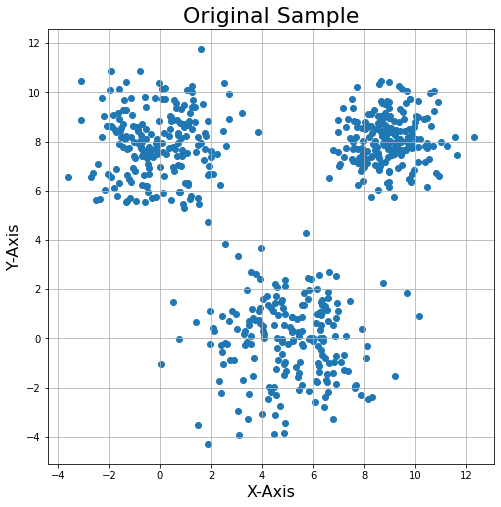

In [24]:
plt.figure(figsize=(8,8))                                 
plt.scatter(d[:,0], d[:,1], marker='o')     
# plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Original Sample', fontsize=22)    
plt.grid()            
plt.show
## Here we see that the original clusters are random and are placed far apart.

In [18]:
# Taking initial guesses for the parameters
np.random.seed(9000)
m1 = np.random.choice(len(d))
m1 = d[m1]
m2 = np.random.choice(len(d))
m2 = d[m2]
m3 = np.random.choice(len(d))
m3 = d[m3]

cov1 = [[8, 0], [0, 8]]  # np.cov(np.transpose(d))
cov2 = [[8, 0], [0, 5]]  # np.cov(np.transpose(d))
cov3 = [[5, 0], [0, 5]]

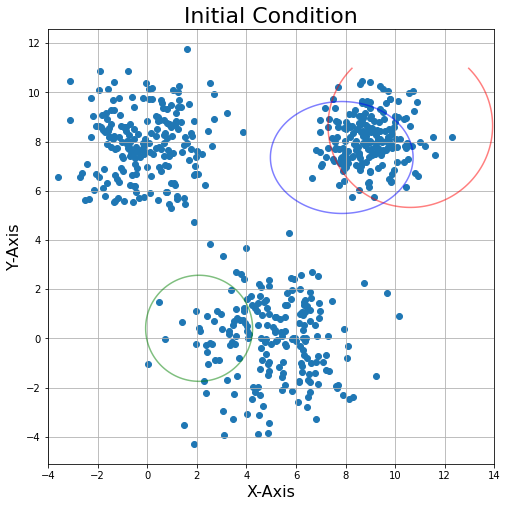

In [19]:
x1 = np.linspace(-4,14,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)
Z3 = multivariate_normal(m3, cov3)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), levels=1, colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), levels=1, colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), levels=1, colors="g" ,alpha = 0.5) 
# plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial Condition', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [20]:
# Expectation step

def Estep(paramlist):
    m1 = paramlist[0]
    m2 = paramlist[1]
    m3 = paramlist[2]
    
    cov1 = paramlist[3]
    cov2 = paramlist[4]
    cov3 = paramlist[5]
    
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt3 = multivariate_normal.pdf(d, mean=m3, cov=cov3)
    
    w1 = pi * pt1
    w2 = pi * pt2
    w3 = pi * pt3
    eval1 = w1/(w1+w2+w3)
    eval2 = w2/(w1+w2+w3)
    eval3 = w3/(w1+w2+w3)
    evals = np.array([eval1, eval2, eval3])

    return(evals.T)

In [21]:
# Maximization step

def Mstep(evals):

    num_mu1,din_mu1, num_mu2,din_mu2, num_mu3,din_mu3 = 0,0,0,0,0,0
    for i in range(len(d)):

        num_mu1 += evals[i][0] * d[i]
        din_mu1 += evals[i][0]

        num_mu2 += evals[i][1] * d[i]
        din_mu2 += evals[i][1]
        
        num_mu3 += evals[i][2] * d[i]
        din_mu3 += evals[i][2]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2
    mu3 = num_mu3/din_mu3

    num_s1,din_s1, num_s2,din_s2, num_s3,din_s3 = 0,0,0,0,0,0    
    for i in range(len(d)):
        
        q1 = np.matrix(d[i]-mu1)
        num_s1 += evals[i][0] * np.dot(np.mean(np.diag(np.dot(q1.T, q1))), np.eye(2))
        din_s1 += evals[i][0]

        q2 = np.matrix(d[i]-mu2)
        num_s2 += evals[i][1] * np.dot(np.mean(np.diag(np.dot(q2.T, q2))), np.eye(2))
        din_s2 += evals[i][1]
        
        q3 = np.matrix(d[i]-mu3)
        num_s3 += evals[i][2] * np.dot(np.mean(np.diag(np.dot(q3.T, q3))), np.eye(2))
        din_s3 += evals[i][2]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2
    s3 = num_s3/din_s3
    
    lis2 = [mu1, mu2, mu3, s1, s2, s3]
    return(lis2)

In [22]:
def plot(paramlist): 
    
    x1 = np.linspace(-4,14,200)  
    x2 = np.linspace(-4,11,200)
    X, Y = np.meshgrid(x1,x2) 
    
    mu1 = paramlist[0]
    mu2 = paramlist[1]
    mu3 = paramlist[2]
    
    s1 = paramlist[3]
    s2 = paramlist[4]
    s3 = paramlist[5]
    
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)
    Z3 = multivariate_normal(mu3, s3)

    pos = np.empty(X.shape + (2,))                                                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(8,8))                                                     # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), levels=1, colors="r" ,alpha = 1.0) 
    plt.contour(X, Y, Z2.pdf(pos), levels=1, colors="b" ,alpha = 1.0)
    plt.contour(X, Y, Z3.pdf(pos), levels=1, colors="g" ,alpha = 1.0)
    
    plt.xlabel('X-Axis', fontsize=16)                                             
    plt.ylabel('Y-Axis', fontsize=16)                                             
    plt.grid()                                                                    
    plt.show()

[[4.39148506 0.        ]
 [0.         4.39148506]]
[[11.0916395  0.       ]
 [ 0.        11.0916395]]
[[8.58752148 0.        ]
 [0.         8.58752148]]


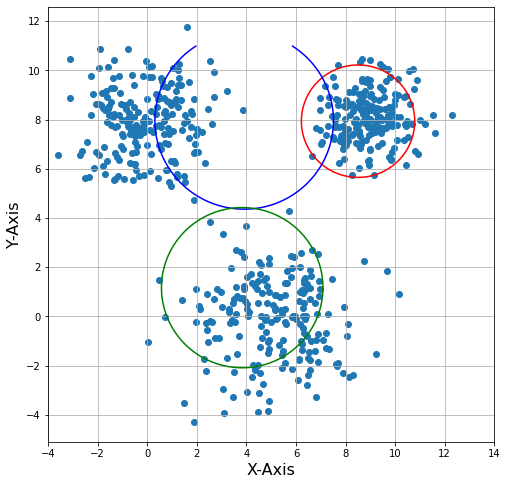

[[0.99417727 0.        ]
 [0.         0.99417727]]
[[2.82622672 0.        ]
 [0.         2.82622672]]
[[3.17731869 0.        ]
 [0.         3.17731869]]


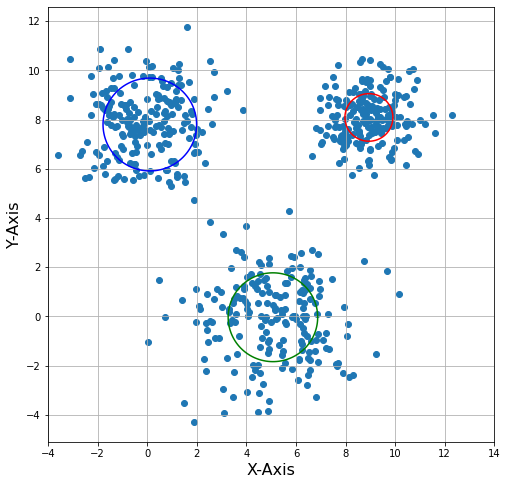

[[1.00933328 0.        ]
 [0.         1.00933328]]
[[1.85401077 0.        ]
 [0.         1.85401077]]
[[2.86704272 0.        ]
 [0.         2.86704272]]


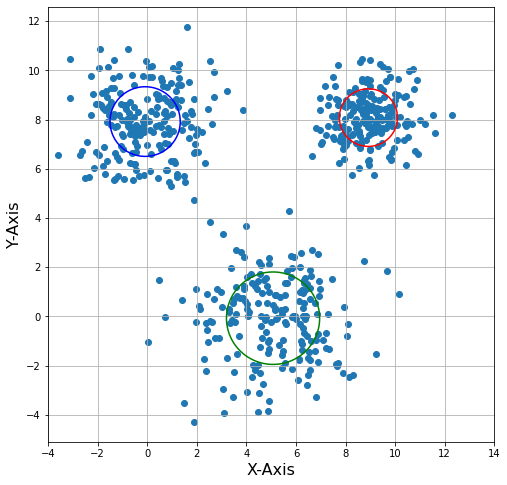

[[1.00932749 0.        ]
 [0.         1.00932749]]
[[1.85279649 0.        ]
 [0.         1.85279649]]
[[2.86859615 0.        ]
 [0.         2.86859615]]


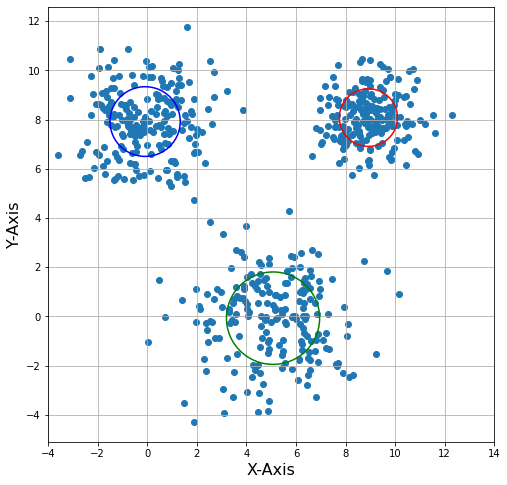

In [23]:
iterations = 100
lis1=[m1,m2,m3,cov1,cov2,cov3]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 2 or i == 4 or i == 9):
        print(lis1[3])
        print(lis1[4])
        print(lis1[5])
        plot(lis1)